# K-Nearest Neighbor

<div class="alert-success">
Nama :Arif Su'admaji
</div>

<div class="alert-danger">
Github : https://github.com/arifsuadmaji
</div>

<div class="alert-warning">
Pengantar Data Mining
</div>

<div class="alert-info">
2023
</div

### Model K-Nearest Neighbors (KNN) Secara Matematis

K-Nearest Neighbors (KNN) adalah algoritma machine learning yang sederhana namun efektif untuk klasifikasi dan regresi. KNN bekerja dengan mencari sejumlah \( $K$ \) data titik terdekat (neighbors) dari sebuah titik data baru, dan menentukan label atau nilai berdasarkan mayoritas atau rata-rata dari neighbors tersebut.

#### 1. **Definisi dan Ide Dasar**

KNN mengasumsikan bahwa data yang serupa (titik data yang dekat) cenderung memiliki kelas yang sama. Dalam konteks klasifikasi, prediksi kelas dilakukan dengan mayoritas voting dari kelas \( $K$ \) neighbors terdekat. Dalam konteks regresi, prediksi dilakukan dengan menghitung rata-rata dari nilai \( $K$ \) neighbors terdekat.

#### 2. **Rumus-Rumus Penting**

1. **Jarak Euclidean**

   Untuk dua titik data \( $x_i$ \) dan \( $x_j$ \) di ruang fitur \( $\mathbb{R}^n$ \), jarak Euclidean \( $d(x_i, x_j)$ \) didefinisikan sebagai:
   
   $$d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{i_k} - x_{j_k})^2}$$
   
   di mana \( $x_{i_k}$ \) dan \($ x_{j_k}$ \) adalah nilai fitur ke-k dari titik data \( $x_i$ \) dan \( $x_j$ \).

2. **Jarak Manhattan**

   Alternatif lain untuk mengukur jarak adalah jarak Manhattan (L1 norm):
   
   $$d(x_i, x_j) = \sum_{k=1}^{n} |x_{i_k} - x_{j_k}|$$
   
   
#### 3. **Algoritma KNN**

Berikut adalah langkah-langkah dalam algoritma KNN:

1. **Menentukan nilai \( $K$ \)**: Memilih jumlah neighbors terdekat.
2. **Menghitung jarak**: Menghitung jarak antara titik data baru dengan semua titik data dalam dataset menggunakan jarak Euclidean, Manhattan, atau metrik lainnya.
3. **Menentukan neighbors terdekat**: Mengidentifikasi \( $K$ \) titik data terdekat berdasarkan jarak yang telah dihitung.
4. **Voting (Klasifikasi) atau rata-rata (Regresi)**: 
   - Untuk klasifikasi: Melakukan voting untuk menentukan kelas mayoritas dari \( $K$ \) neighbors terdekat.
   - Untuk regresi: Menghitung rata-rata nilai dari \( $K$ \) neighbors terdekat.
5. **Memberikan prediksi**: Menghasilkan prediksi kelas atau nilai berdasarkan hasil voting atau rata-rata.

#### 4. **Contoh**

Misalkan kita memiliki dataset dengan dua fitur dan dua kelas (merah dan biru). Untuk titik data baru \( x \) yang akan diprediksi, kita melakukan langkah-langkah berikut:

1. Menentukan \( K = 3 \).
2. Menghitung jarak antara \( x \) dan semua titik data dalam dataset.
3. Memilih 3 titik data terdekat.
4. Melakukan voting untuk menentukan kelas mayoritas dari 3 titik data terdekat.

Jika dua dari tiga neighbors adalah biru dan satu adalah merah, maka prediksi untuk \( x \) adalah kelas biru.

# Import Library

In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

#for modeling
from sklearn.neighbors import KNeighborsClassifier

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix


# Input Data

In [2]:
df = pd.read_csv("titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Show last 5 lines

In [3]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Feature Selection(Variabel)

In [4]:
df.drop(columns=['Name','Ticket'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


# Checking duplicated dataset 

In [5]:
df.duplicated()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887     True
888    False
889    False
890    False
891    False
Length: 891, dtype: bool

# Check Missing Value

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Information of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


# Handling Missing Value

### Drop

In [8]:
df.drop(columns=['Age','Cabin'], inplace=True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,0,2,male,0,0,13.0000,S
888,1,1,female,0,0,30.0000,S
889,0,3,female,1,2,23.4500,S


In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Ingat!! Metode diatas hanya digunakan ketika tipe data numerik, tidak untuk data kategori

### Handling Missing value Categorical dataset

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Fillna with most frequensi

In [12]:
df.fillna({'Embarked':'S'}, inplace=True)

# df.dropna(columns=['Embarked'], axis=0, inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Categorical Encoding

In [14]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 48.7 KB


# Train-Test Split

In [32]:
X = df.drop(columns='Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

# Scaling

In [33]:
columns = ['Fare']
scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

# K-Nearest Neighbor Model

In [34]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluate model

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [36]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred))

accuracy_score:  0.8044692737430168


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[90, 15],
       [20, 54]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

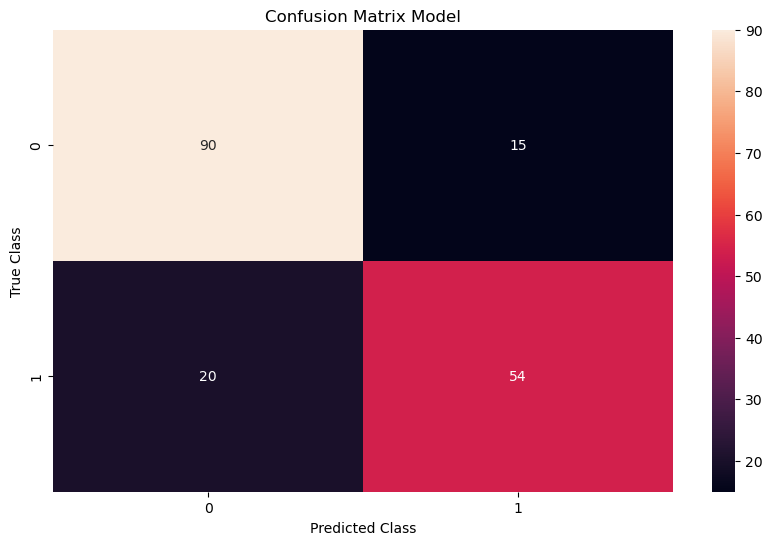

In [39]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")